![header](../figures/logos_partenaires._cmems_se.jpg)


<div class="alert alert-block alert-success">
<h1><center>Read and plot Mediterranean Sea SWOT data at one specific date </center></h1>
<h2><center>For 21 day orbit data</center></h2></div>

***
**Authors:**  Datlas, IGE, IMEDEA & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMEDEA & CLS <br>
**License:** MIT

In [1]:
import os
import glob
import sys
sys.path.append('..')
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt


from src import mod_plot
from src import mod_switchvar
from src.dict_regions_info import *

In [2]:

region_info = RegionInfo('Med_info').region_info   # Region dictionary info from dict_regions_info.py

method = 'Unet_baseline'   # Name for plots title and saving figures

name_denoised = 'ssha_denoised_unet' # Name of the denoised SWOT variable in the xarray file 

## Read from regional data file "../swot_data/swot_21j_share_'region'.nc"

In [3]:
path_data = '../swot_data/swot_21j_share_'+region_info['name']+'.nc' 

date_plot = np.datetime64('2023-09-12')

orbit = '21d'

In [4]:
ds_SWOT = xr.open_mfdataset(path_data)

ds_SWOT = ds_SWOT.where(ds_SWOT.time>date_plot,drop=True)
ds_SWOT = ds_SWOT.where(ds_SWOT.time<date_plot+np.timedelta64(1,'D'),drop=True) 

## Plot noisy and baseline denoised SSH

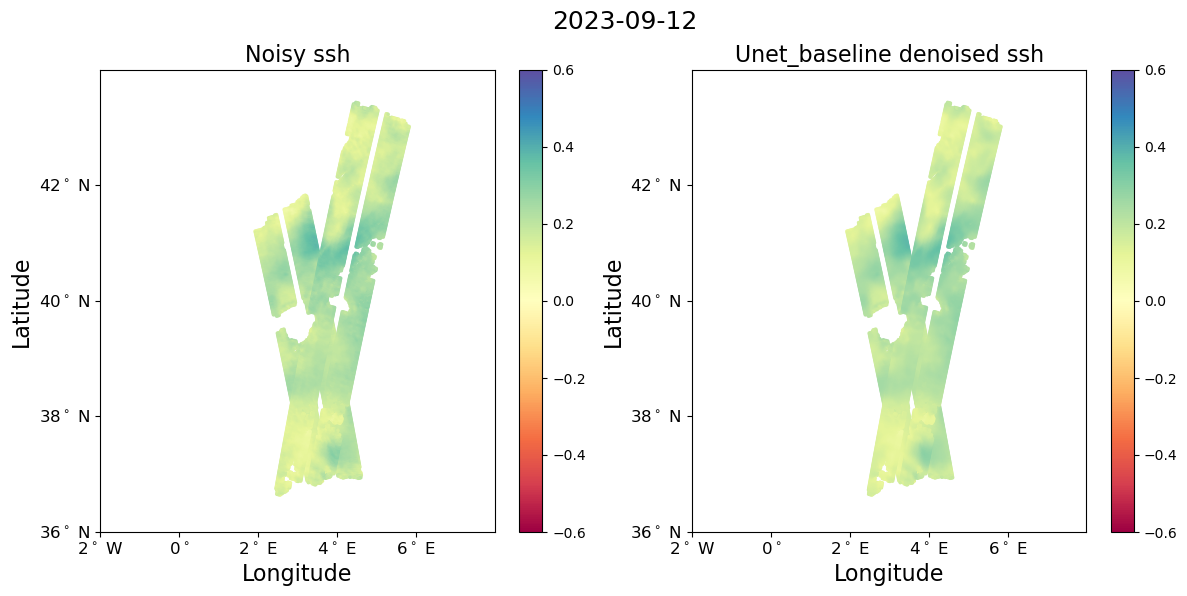

In [5]:
 
mod_plot.plot_snapshots(ds_SWOT, variable = 'ssh', name_denoised='ssha_denoised_unet', date_plot=date_plot, region_info=region_info, method=method, orbit = orbit)


## Compute and plot SSH gradients and Laplacian

In [6]:
grad_new_editing, lapl_new_editing = mod_switchvar.deriv1and2(ds_SWOT.ssha_new_editing)
grad_denoised_unet, lapl_denoised_unet = mod_switchvar.deriv1and2(ds_SWOT.ssha_denoised_unet)

ds_SWOT = ds_SWOT.assign(grad_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + grad_new_editing)
ds_SWOT = ds_SWOT.assign(grad_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + grad_denoised_unet)

ds_SWOT = ds_SWOT.assign(lapl_new_editing=lambda ds_SWOT: ds_SWOT.ssha_new_editing * 0 + lapl_new_editing)
ds_SWOT = ds_SWOT.assign(lapl_denoised_unet=lambda ds_SWOT: ds_SWOT.ssha_denoised_unet * 0 + lapl_denoised_unet)


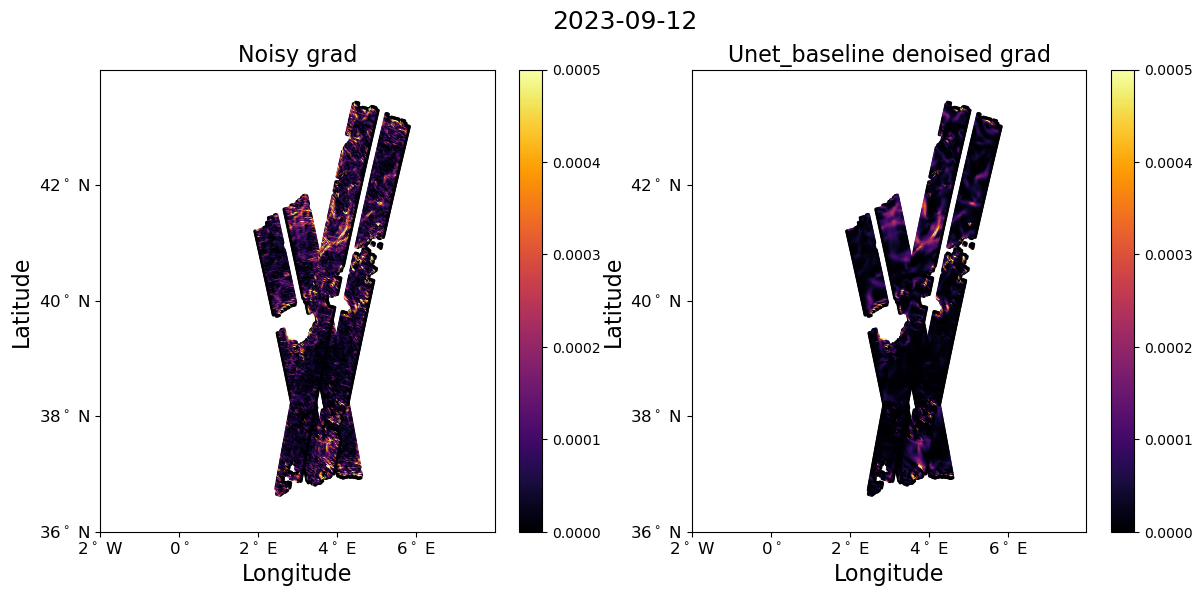

In [7]:

mod_plot.plot_snapshots(ds_SWOT, variable = 'grad', name_denoised='grad_denoised_unet', date_plot=date_plot, region_info=region_info, method=method, orbit = '21d')


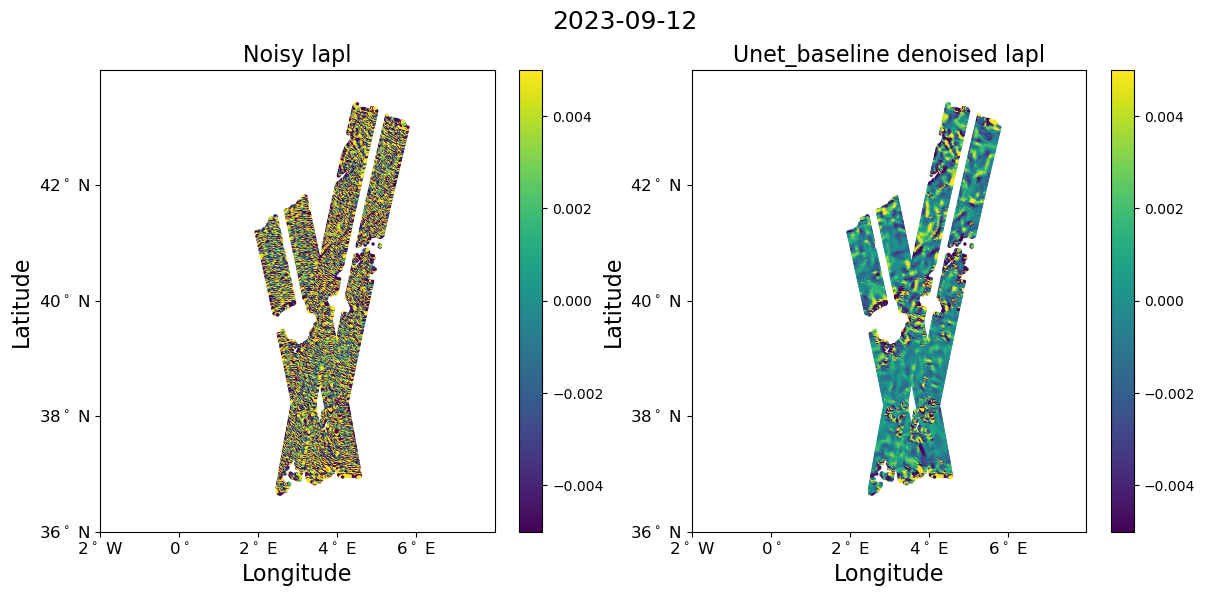

In [8]:
 
mod_plot.plot_snapshots(ds_SWOT, variable = 'lapl', name_denoised='lapl_denoised_unet', date_plot=date_plot, region_info=region_info, method=method, orbit = '21d')
